In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import integrate
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Завдання 1

In [2]:
gamma=0.01
zg=2.575
n=[100,10000,1000000]

In [3]:
an=0
sigman=[0,0,0]
an2=[0,0,0]
sigman1=[0,0,0]
sigman2=[0,0,0]
for i in range(1,n[2]):
    xi=np.random.normal(0.0, 1.0)
    an+=xi
    if i==n[0]:
        an2[0]=an/n[0]
    if i==n[1]:
        an2[1]=an/n[1]
an2[2]=an/n[2]

In [4]:
for i in range(1,n[2]):
    xi=np.random.normal(0.0, 1.0)
    an+=xi
    if i<=n[0]:
        sigman[0]+=(xi-an2[0])**2
        sigman[1]+=(xi-an2[1])**2
        sigman[2]+=(xi-an2[2])**2
    if n[0]<i<=n[1]:
        sigman[1]+=(xi-an2[1])**2
        sigman[2]+=(xi-an2[2])**2
    if n[1]<i<=n[2]:
        sigman[2]+=(xi-an2[2])**2
    if i==100:
        sigman2[0]=sigman[0]/n[0]
        sigman1[0]=sigman[0]/(n[0]-1)
    if i==10000:
        sigman2[1]=sigman[1]/n[1]
        sigman1[0]=sigman[0]/(n[0]-1)
sigman2[2]=sigman[2]/n[2]
sigman1[2]=sigman[2]/(n[2]-1)

# 1.A.	Довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., які мають нормальний розподіл, але дисперсія невідома.

In [5]:
a=[0,0]
for i in range (0,3):
    sg = stats.t(df=n[i]).ppf(1-gamma)
    a[0]=an2[i]-sg*sigman2[i]/math.sqrt(n[i]-1)
    a[1]=an2[i]+sg*sigman2[i]/math.sqrt(n[i]-1)
    print("n = " + str(n[i]))
    print("     a_n = " + str(an2[i]))
    print("     a_n in (" + str(a[0])+", "+str(a[1])+")")
    print("     length = " + str(abs(a[0])+abs(a[1])))

n = 100
     a_n = -0.13620854024180676
     a_n in (-0.2882895766173785, 0.015872496133764957)
     length = 0.30416207275114343
n = 10000
     a_n = -0.01660361066035512
     a_n in (-0.039892509526085085, 0.00668528820537485)
     length = 0.04657779773145994
n = 1000000
     a_n = -0.0021920630644140433
     a_n in (-0.004517487356673825, 0.00013336122784573775)
     length = 0.004650848584519562


# 1.B.	Довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., розподіл яких невідомий

In [6]:
for i in range (0,3):
    a[0]=an2[i]-zg*sigman1[i]/math.sqrt(n[i]-1)
    a[1]=an2[i]+zg*sigman1[i]/math.sqrt(n[i]-1)
    print("n = " + str(n[i]))
    print("     a_n = " + str(an2[i]))
    print("     a_n in (" + str(a[0])+", "+str(a[1])+")")
    print("     length = " + str(abs(a[0])+abs(a[1])))

n = 100
     a_n = -0.13620854024180676
     a_n in (-0.3035215451666193, 0.03110446468300576)
     length = 0.33462600984962504
n = 10000
     a_n = -0.01660361066035512
     a_n in (-0.01660361066035512, -0.01660361066035512)
     length = 0.03320722132071024
n = 1000000
     a_n = -0.0021920630644140433
     a_n in (-0.004766039213380348, 0.0003819130845522608)
     length = 0.005147952297932608


# 1.C.	Побудувати довірчий інтервал для дисперсії у припущенні, що спостерігаються в.в., які мають нормальний розподіл

In [7]:
sig=[0,0]
for i in range (0,3):
    sg1 = stats.chi2(df=n[i]).ppf(gamma/2)
    sg2 = stats.chi2(df=n[i]).ppf(1-gamma/2)
    sig[0]=(n[i]*sigman2[i])/sg2
    sig[1]=(n[i]*sigman2[i])/sg1
    print("n = " + str(n[i]))
    print("     sigma_n = " + str(sigman2[i]))
    print("     sigma_n in (" + str(sig[0])+", "+str(sig[1])+")")
    print("     length = " + str(abs(abs(sig[0])-abs(sig[1]))))

n = 100
     sigma_n = 0.6400372605246564
     sigma_n in (0.4566166739075277, 0.9506318498720564)
     length = 0.4940151759645287
n = 10000
     sigma_n = 1.0008821859777164
     sigma_n in (0.9653539691514945, 1.0383155396624797)
     length = 0.07296157051098517
n = 1000000
     sigma_n = 0.9996008885448721
     sigma_n in (0.9959690582334821, 1.0032517377353467)
     length = 0.007282679501864564


# Завдання 2

In [8]:
def find_qi_method1(m):
    si=0
    qi=0
    wi=np.random.uniform(0.0, 1.0)
    eta = 1/wi-1
    for i in range(0,m):
        wi=np.random.uniform(0.0, 1.0)
        xi=-np.log(wi)
        si+=xi
    if eta>si:
        qi=1
    return qi

In [9]:
def find_qi_method2(m):
    si=0
    qi=0
    wi=np.random.uniform(0.0, 1.0)
    eta = 1/wi-1
    for i in range(1,m+1):
        wi=np.random.uniform(0.0, 1.0)
        xi=-np.log(wi)
        si+=xi
    qi=1/(1+si)
    return qi

In [10]:
def find_qi_method3(m):
    si=0
    qi=0
    wi=np.random.uniform(0.0, 1.0)
    eta = 1/wi-1
    for i in range(0,m):
        si+=(eta**i)/(math.factorial(i)*(math.exp(eta)))
    qi=1-si
    return qi

In [11]:
def find_qi_method4(m):
    si=0
    qi=0
    wi=np.random.uniform(0.0, 1.0)
    eta = 1/wi-1
    for i in range(1,m):
        wi=np.random.uniform(0.0, 1.0)
        xi=-np.log(wi)
        si+=xi
    qi=si/((m-1)(1+si))
    return qi

In [12]:
def alg(m,meth):
    n0=1
    sigma0=0
    n=1000000
    stopper=0
    si=0
    while n<1000100 and stopper==0:
        si=0
        si2=0
        start_time = datetime.now()
        for i in range(0,n):
            if meth==1:
                qi = find_qi_method1(m)
            if meth==2:
                qi = find_qi_method2(m)
            if meth==3:
                qi = find_qi_method3(m)
            if meth==4 and m!=1:
                qi = find_qi_method4(m)
            si+=qi
            si2+=qi*qi
            #print("qi = "+str(qi)+ "     sum = "+str(si))
        print(datetime.now() - start_time)
        Qin=si/n
        Sigma=(si/(n-1))+(Qin*Qin*n)/(n-1)
        print("Qi = " + str(Qin) + "     Sigma = " + str(Sigma))
        print("criteria:     abs(Sigma-sigma0) = "+ str(abs(Sigma-sigma0)))
        if abs(Sigma-sigma0)<=0.1:
            x=n+1
            if Qin!=0:
                x=(66306.25*Sigma)/(Qin**2)
            #else:
                #stopper=1
            print("criteria2:     x = "+ str(x) + "     n = " + str(n))
            if n>=x:
                stopper=1
            else:
                n=n+1
        else:
            n=n+1
            sigma0=Sigma
        print()
    return Qin, Sigma, n

In [13]:
m=[1,100,1000]
n0=[30000,6000000,60000000]

# 2.A.	При кожному m обчислити точне значення ймовірності Q_m

In [14]:
def frac(x,m):
    x2=1
    for i in range(1,m):
        x2*=x
        x2/=i
    return x2

In [15]:
def f100(x):
    return np.e**(-x)*frac(x,100)/(1+x)

In [16]:
def f10(x):
    return np.e**(-x)*frac(x,10)/(1+x)

In [17]:
def f1(x):
    return np.e**(-x)/(1+x)

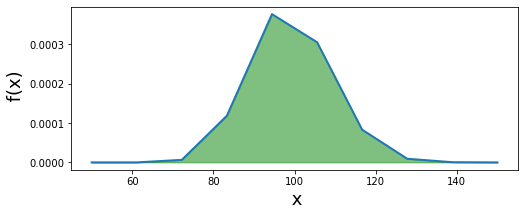

Integral = 0.009978522345681032


In [18]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(50, 150, 10)
ax.plot(x, f100(x), lw=2)
ax.fill_between(x, f100(x), color='green', alpha=0.5)
ax.set_xlabel(" x", fontsize=18)
ax.set_ylabel(" f(x)", fontsize=18)
plt.show()
v, err = integrate.quad(f100, 60, 130)
print ("Integral = "+str(v))

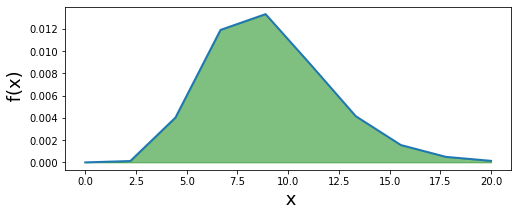

Integral = 0.09870754523350572


In [19]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(0, 20, 10)
ax.plot(x, f10(x), lw=2)
ax.fill_between(x, f10(x), color='green', alpha=0.5)
ax.set_xlabel(" x", fontsize=18)
ax.set_ylabel(" f(x)", fontsize=18)
plt.show()
v, err = integrate.quad(f10, 0, 20)
print ("Integral = "+str(v))

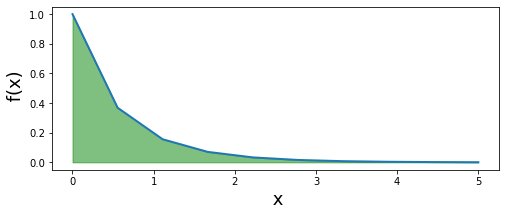

Integral = 0.5963435559123227


In [20]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(0, 5, 10)
ax.plot(x, f1(x), lw=2)
ax.fill_between(x, f1(x), color='green', alpha=0.5)
ax.set_xlabel(" x", fontsize=18)
ax.set_ylabel(" f(x)", fontsize=18)
plt.show()
v, err = integrate.quad(f1, 0, 10)
print ("Integral = "+str(v))

# 2.B-E. Збірна таблиця для різних методів та різних m

In [21]:
data_array = pd.read_csv('res.csv',delimiter=';')

In [22]:
data_array

,m,meth,Q,S,n
0,1,1,0.594971,2.409860e-01,45140
1,1,2,0.599321,4.771240e-02,8808
2,1,3,0.600027,1.137500e-01,20950
3,10,1,0.099039,8.923040e-02,603197
4,10,2,0.099044,9.201970e-04,6220
5,10,3,0.099258,7.292440e-02,490792
6,10,4,0.099643,4.284080e-08,2
7,100,1,0.010002,9.902300e-03,6562861
8,100,2,0.010049,1.119690e-06,736
9,100,3,0.010013,9.352790e-03,6185817


In [23]:
a0=[]
a1=[]
for i in range (len(data_array)):
    a0.append(data_array["Q"][i]-zg*data_array["S"][i]/math.sqrt(data_array["n"][i]-1))
    a1.append(data_array["Q"][i]+zg*data_array["S"][i]/math.sqrt(data_array["n"][i]-1))

In [24]:
data_array["a_0"]=a0
data_array["a_1"]=a1
data_array

,m,meth,Q,S,n,a_0,a_1
0,1,1,0.594971,2.409860e-01,45140,0.592050,0.597892
1,1,2,0.599321,4.771240e-02,8808,0.598012,0.600630
2,1,3,0.600027,1.137500e-01,20950,0.598003,0.602051
3,10,1,0.099039,8.923040e-02,603197,0.098743,0.099335
4,10,2,0.099044,9.201970e-04,6220,0.099014,0.099074
5,10,3,0.099258,7.292440e-02,490792,0.098990,0.099526
6,10,4,0.099643,4.284080e-08,2,0.099643,0.099643
7,100,1,0.010002,9.902300e-03,6562861,0.009992,0.010012
8,100,2,0.010049,1.119690e-06,736,0.010049,0.010049
9,100,3,0.010013,9.352790e-03,6185817,0.010003,0.010022
